# <a id='toc1_'></a>[Inaugural Project](#toc0_)

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
  - [Member](#toc1_1_)    
- [Question 1](#toc2_)    
- [Question 2](#toc3_)    
- [Question 3](#toc4_)    
- [Question 4](#toc5_)    
- [Question 5](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Member](#toc0_)
- [Emil Kjems](https://github.com/E-Kjems)

Imports and set magics:

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
# Defining model
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a id='toc2_'></a>[Question 1](#toc0_)

**Explain how you solve the model**

In [265]:
# code for solving the model (remember documentation and comments)

# a = np.array([1,2,3])
# b = inauguralproject.square(a)
# print(b)

In [266]:
# Defining the discrete values of alha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

In [267]:
# create empty list to store results
results = []

# Making the varying alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# loop through each combination of alpha and sigma
for alpha in alpha_list:    
    for sigma in sigma_list:
        # assigning the different value to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model with the new different values of alpha and sigma
        opt = model.solve_discrete()

        # append results to list
        results.append({'alpha': alpha, 'sigma': sigma, 'HF': opt.HF, 'HM': opt.HM, 'HF/HM': opt.HF/opt.HM})

# create dataframe from results
df = pd.DataFrame(results).round({'HF/HM': 2})

# set alpha and sigma columns as index
df.set_index(['alpha', 'sigma'], inplace=True)

# apply formatting to the dataframe
styled_df = df.style.format({'HF': '{:.1f}', 'HM': '{:.1f}', 'HF/HM': '{:.2f}'})

# display the styled dataframe
display(styled_df)

/Users/emil/Desktop/6. semester/Introduction to programming and numerical analysis/projects-2023-s/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


# <a id='toc3_'></a>[Question 2](#toc0_)

Explain your code and procedure

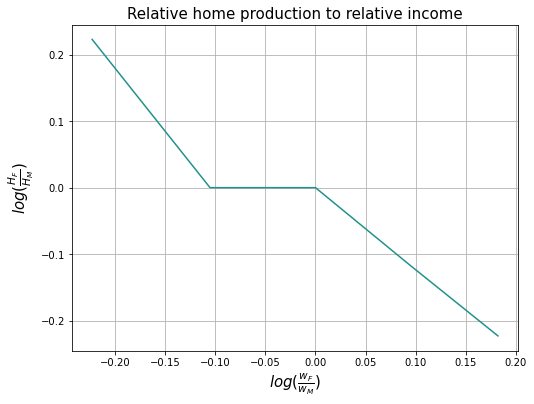

In [268]:
# Resetting alpha and sigma to their respective baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Defining male and female wages and retrieving them from HouseholdSpecializationModel
wF = model.par.wF_vec
wM = model.par.wM

# Creating empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

# Finding the optimal values for HF and HM by iteration using the discrete solver
# And appending them to the lists above
for femalewages in wF:
    model.par.wF = femalewages
    opt = model.solve_discrete()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

# Choose a visually appealing color palette
cmap = plt.get_cmap('viridis')

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot log(HF/HM) and log(wF/wM) against each other
ax.plot(log_wages, log_ratio, color=cmap(0.5))

# Add grid lines
ax.grid(True, which='both')

# Add x and y axis labels and title
ax.set_xlabel(r'$log(\frac{w_F}{w_M})$', fontsize=15)
ax.set_ylabel(r'$log(\frac{H_F}{H_M})$', fontsize=15)
ax.set_title("Relative home production to relative income", fontsize=15)

# Show the plot
plt.show()

# <a id='toc4_'></a>[Question 3](#toc0_)

I defined an optimization method in "HouseholdSpecializationModel.py" called "solve_continuous". Using the "minimize" function from the "scipy.optimize" library, I found the values of "LM", "HM", "LF", and "HF" that maximize the objective function. The method takes an initial guess for the values and returns the optimal values of these variables that maximize the objective function. The constraints are used to limit the set of solutions to 24 hours in a day.

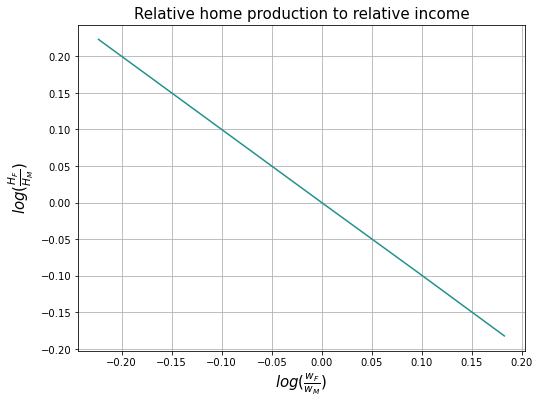

In [269]:
# Resetting alpha and sigma to their respective baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

# Defining male and female wages and retrieving them from HouseholdSpecializationModel
wF = model.par.wF_vec
wM = model.par.wM

# Creating empty lists for the values of log(HF/HM) and log(wF/wM)
log_ratio = []
log_wages = []

# Finding the optimal values for HF and HM by iteration using the continous solver
# And appending them to the lists above
for femalewages in wF:
    model.par.wF = femalewages
    opt = model.solve_continuous()
    log_ratio.append(np.log(opt.HF/opt.HM))
    log_wages.append(np.log(femalewages/wM))

# Choose a visually appealing color palette
cmap = plt.get_cmap('viridis')

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot log(HF/HM) and log(wF/wM) against each other
ax.plot(log_wages, log_ratio, color=cmap(0.5))

# Add grid lines
ax.grid(True, which='both')

# Add x and y axis labels and title
ax.set_xlabel(r'$log(\frac{w_F}{w_M})$', fontsize=15)
ax.set_ylabel(r'$log(\frac{H_F}{H_M})$', fontsize=15)
ax.set_title("Relative home production to relative income", fontsize=15)

# Show the plot
plt.show()

# <a id='toc5_'></a>[Question 4](#toc0_)

Initially, a function called "solve" is created in the file "HouseholdSpecializationModel.py" to find the vector of female wages named "solve_wF_vec".

Afterward, an "estimate" function is developed to solve the minimization problem by utilizing the Nelder-Mead algorithm. 
This function takes the output of "solve_wf_vec" as an input and applies OLS regression.

The results suggest support for the estimated values of alpha and sigma

/Users/emil/Desktop/6. semester/Introduction to programming and numerical analysis/projects-2023-s/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


sigma = 0.10, alpha = 0.98 -> beta0 = 0.40, beta1 = -0.10


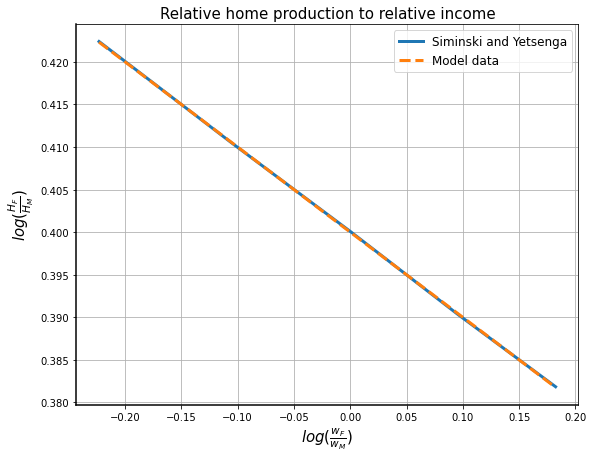

In [270]:
#  use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# find the log Home ratio 
log_H_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# Figure to illustrate relationship between log H ratio and log w ratio
fig2, ax = plt.subplots(figsize=(9, 7))

# Add the 'log_H_ratio' and the weights as scatterplot 
ax.plot(np.log(model.par.wF_vec),log_H_ratio, '-', label='Siminski and Yetsenga', linewidth=3)
# Add the model regression
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec), '--', label='Model data', linewidth=3)


# Add grid lines
ax.grid(True, which='both')

# Add x and y axis labels and title
ax.set_xlabel(r'$log(\frac{w_F}{w_M})$', fontsize=15)
ax.set_ylabel(r'$log(\frac{H_F}{H_M})$', fontsize=15)
ax.set_title("Relative home production to relative income", fontsize=15)

# Add legend
ax.legend(fontsize=12)

# Increase line thickness of x and y axis lines
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Show the plot
plt.show()

# <a id='toc6_'></a>[Question 5](#toc0_)

In [276]:
# Run the basic model
results = model.estimation_extended(extended=False)

print(f'Squared errors are minimized if alpha is {model.par.alpha:.1f} and sigma is {float(model.par.sigma):.3f}.')
print (f'If so, the coefficients of beta are, beta1: {model.sol.beta1:.3f} and beta0: {model.sol.beta0:.3f} and consequently the minimized squared error is {results.error:.2f}.')

Squared errors are minimized if alpha is 0.5 and sigma is 0.097.
If so, the coefficients of beta are, beta1: -0.097 and beta0: 0.000 and consequently the minimized squared error is 0.16.
